# UDACITY - DATA ANALYST NANODEGREE PROJECT #5
## Ford - Go Bike Sharing System

## Introduction

In this study, 20 different data frames that contain various information for the 'Ford GoBike' bike sharing system are gathered, assessed, cleaned and analyzed.

#### The dataset information
We combined all data frames. It includes more than 3.8 million observations (rows) and 19 columns that hold various information for the bike sharing system users such as usage duration, user birth year etc.

#### Why this dataset?
I am currently working for one of the joint ventures of Ford Motor Company as an engineer.<br>
Thus, I am really interested to study with 'Ford GoBike' data. In this study, one of the my goals is to understand the bike sharing system charactheristics for example which gender of users prefer this system or how old they're mostly.

#### Research Questions
Univariate Exploration (Only one variable is considered)
1. Mostly preferred bike sharing locations (Find top-10)
2. Mostly preferred trip routes (Also find the most preffered trip route)
3. The age distribution of Ford GoBike users
4. Bike usage according to daily hour, day and month
5. Trip durations over days
6. User types

Bivariate Exploration (Two variables are considered at the same time)
1. Hourly bike usage according to user type
2. Monthly bike usage according to user type

Multivariate Exploration 
1. Hourly bike usage according to gender
2. Monthly bike usage according to gender

**Reported by:** Ugur URESIN, MSc.

In [1]:
## REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import requests
from os import path, getcwd, chdir, makedirs, listdir

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import calendar
import datetime
import csv

#Reference: https://stackoverflow.com/questions/9419162/download-returned-zip-file-from-url
from io import BytesIO 
from zipfile import ZipFile

**Note that** there is no need to run following codes till the Exploratory Analysis section.<br>
There is a clean master dataframe to import in Exploratory Analysis section.

## DATA GATHERING

In [15]:
#Checking the current working directory
getcwd()

'/Users/UGUR/Desktop/mycodes/training/Udacity_DAND/project5'

#### IMPORTANT!
Related data is gathered from the following link in 2019/08/25<br>
https://s3.amazonaws.com/baywheels-data/index.html<br>
<br>
Following image shows the webpage content when it's reached in 2019/08/25<br>
Please check the image and the webpage to be sure whether the webpage content is changed.<br>
If it's changed, you may need to modify the following codes.<br>

**Contact:** uresinugur35@gmail.com

![Webpage Content in 2019/08/25](webpage_content.png)

In [52]:
#Creating the 'Data' folder in the current working directory
makedirs('Data')
chdir('Data')

In [32]:
#Data Source Definitions
url_17 = 'https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv'

url_head8 = 'https://s3.amazonaws.com/baywheels-data/2018'
url_head9 = 'https://s3.amazonaws.com/baywheels-data/2019'

url_tail_ford = '-fordgobike-tripdata.csv.zip'
url_tail_bay = '-baywheels-tripdata.csv.zip'

In [40]:
#Getting the 2017 Data
print('Downloading the 2017 data is started, please wait!')

r = requests.get(url_17)
with open('2017-fordgobike-tripdata.csv', mode='wb') as file: #wb:write binary
    file.write(r.content)

print('Downloading the 2017 data is completed!')

In [37]:
#Getting the 2018 Data
print('Downloading the 2018 data is started, please wait!')

for month in range(1,13):
    mon_st = str(month)
    mon_st0 = mon_st.zfill(2)
    url_19 = url_head8 + mon_st0 + url_tail
    r = requests.get(url_19)
    z = zipfile.ZipFile(BytesIO(r.content))
    z.extractall()
    
print('Downloading the 2018 data is completed!')

In [23]:
#Getting the 2019 Ford Data
print('Downloading the 2019 Ford data is started, please wait!')

for month in range(1,5):
    mon_st = str(month)
    mon_st0 = mon_st.zfill(2)
    url_19 = url_head9 + mon_st0 + url_tail_ford
    r = requests.get(url_19)
    z = zipfile.ZipFile(BytesIO(r.content))
    z.extractall()
    
print('Downloading the 2019 Ford data is completed!')

In [36]:
#Getting the 2019 Bay Wheels Data
print('Downloading the 2019 Bay Wheels data is started, please wait!')

for month in range(5,8):
    mon_st = str(month)
    mon_st0 = mon_st.zfill(2)
    url_19 = url_head9 + mon_st0 + url_tail_bay
    r = requests.get(url_19)
    z = zipfile.ZipFile(BytesIO(r.content))
    z.extractall()
    
print('Downloading the 2019 Bay Wheels data is completed!')

In [5]:
#Listing the folder content
listdir(getcwd())

['201802-fordgobike-tripdata.csv',
 '201811-fordgobike-tripdata.csv',
 '201904-fordgobike-tripdata.csv',
 '201809-fordgobike-tripdata.csv',
 '.DS_Store',
 '2017-fordgobike-tripdata.csv',
 '201806-fordgobike-tripdata.csv',
 '201907-baywheels-tripdata.csv',
 '201903-fordgobike-tripdata.csv',
 'image01.png',
 '201906-baywheels-tripdata.csv',
 'image03.png',
 '201805-fordgobike-tripdata.csv',
 'image02.png',
 'image06.png',
 'image07.png',
 '201812-fordgobike-tripdata.csv',
 '201801-fordgobike-tripdata.csv',
 'image05.png',
 'image04.png',
 '201905-baywheels-tripdata.csv',
 'image10.png',
 'image09.png',
 'image08.png',
 '201901-fordgobike-tripdata.csv',
 '201807-fordgobike-tripdata.csv',
 '201808-fordgobike-tripdata.csv',
 '201810-fordgobike-tripdata.csv',
 '201803-fordgobike-tripdata.csv',
 '201804-fordgobike-tripdata.csv',
 '201902-fordgobike-tripdata.csv',
 'image01_2.png']

In [4]:
#Only-for repetitive usage!
chdir('/Users/UGUR/Desktop/mycodes/training/Udacity_DAND/project5/Data')

It seems every .csv files are imported!<br>
Let's merge these dataframes into an master dataframe.

In [6]:
#Master dataframe creation
df = []
print('Master data frame cretion is started, please wait!')

for file_name in listdir(getcwd()):
    df.append(pd.read_csv(file_name))
    master_df = pd.concat(df)

print('Master data frame cretion is completed!')

Master data frame cretion is started, please wait!


/Users/UGUR/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys
/Users/UGUR/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/UGUR/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Master data frame cretion is completed!


In [10]:
#Saving the un-clean master dataframe
#THIS TAKES SIGNIFICANT AMOUNT OF TIME!
master_df.to_csv('unc_master_dataframe.csv', encoding='UTF-8', index=False)

**Note that** here 'master data frame' means combined data frames.

## DATA ASSESSMENT & CLEANING

Now, let's check the master dataframe and decide whether cleaning operations is needed!

In [11]:
master_df.shape

(3828132, 19)

In [12]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3828132 entries, 0 to 183411
Data columns (total 19 columns):
Unnamed: 0                 object
Unnamed: 16                object
bike_id                    float64
bike_share_for_all_trip    object
duration_sec               float64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(9), object(10)
memory usage: 584.1+ MB


In [13]:
master_df.sample(20)

,Unnamed: 0,Unnamed: 16,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
79641,NaN,NaN,1094.0,No,421.0,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2018-11-09 13:21:40.0990,1985.0,Female,NaN,372.0,37.804037,-122.262409,Madison St at 17th St,2018-11-09 13:14:38.2080,Subscriber
115719,NaN,NaN,600.0,No,169.0,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2019-05-11 09:20:20.7710,1988.0,Male,NaN,81.0,37.775880,-122.393170,Berry St at 4th St,2019-05-11 09:17:31.5990,Subscriber
64813,NaN,NaN,3087.0,No,310.0,129.0,37.758862,-122.412544,Harrison St at 20th St,2018-11-13 09:00:01.0700,1988.0,Male,NaN,88.0,37.770030,-122.411726,11th St at Bryant St,2018-11-13 08:54:50.9790,Subscriber
68252,NaN,NaN,2346.0,No,1139.0,70.0,37.773311,-122.444293,Central Ave at Fell St,2019-06-19 21:07:06.5800,1989.0,Male,NaN,44.0,37.781074,-122.411738,Civic Center/UN Plaza BART Station (Market St ...,2019-06-19 20:48:07.2470,Subscriber
39894,NaN,NaN,1426.0,No,292.0,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2019-05-24 18:01:52.7000,1971.0,Male,NaN,34.0,37.783988,-122.412408,Father Alfred E Boeddeker Park,2019-05-24 17:56:59.7980,Subscriber
113440,NaN,NaN,3402.0,No,1440.0,74.0,37.776435,-122.426244,Laguna St at Hayes St,2018-11-04 14:56:28.1300,1989.0,Female,NaN,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-11-04 14:32:27.8150,Customer
12497,NaN,NaN,3250.0,No,450.0,163.0,37.797320,-122.265320,Lake Merritt BART Station,2018-10-30 09:47:30.3930,1983.0,Male,NaN,200.0,37.800214,-122.253810,2nd Ave at E 18th St,2018-10-30 09:39:59.8680,Subscriber
155546,NaN,NaN,841.0,No,716.0,343.0,37.783172,-122.393572,Bryant St at 2nd St,2019-01-08 18:39:00.8980,1982.0,Male,NaN,116.0,37.764802,-122.394771,Mississippi St at 17th St,2019-01-08 18:27:04.1910,Subscriber
90580,NaN,NaN,3483.0,No,1154.0,36.0,37.783830,-122.398870,Folsom St at 3rd St,2018-02-05 11:32:41.9910,1987.0,Male,NaN,102.0,37.766883,-122.399579,Irwin St at 8th St,2018-02-05 11:13:27.8000,Subscriber
11733,NaN,NaN,2346.0,No,625.0,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2019-01-30 17:51:47.1960,1963.0,Male,NaN,22.0,37.789756,-122.394643,Howard St at Beale St,2019-01-30 17:41:21.6530,Subscriber


At this point also **'visual check'** is conducted outside via Numbers!

The biggest dataframe is '2017-fordgobike-tripdata.csv'<br>
It contains 519,702 rows and the following columns (15):
1. duration_sec
2. start_time
3. end_time
4. start_station_id
5. start_station_name
6. start_station_latitude
7. start_station_longitude
8. end_station_id
9. end_station_name
10. end_station_latitude
11. end_station_longitude
12. bike_id
13. user_type
14. member_birth_year
15. member_gender

The dataframe **'201801-fordgobike-tripdata.csv'** contains 94,804 rows and an additional column 'bike_share_for_all_trip'<br>
According to the 20 sample row from the master dataframe given above, it seems that this column ('bike_share_for_all_trip') is also avaiable in 2019 data as well.<br>

In **'201905-baywheels-tripdata.csv'** dataframe, there are 182,165 rows and same 16 colums.<br>

In [14]:
#Checking the duplicates
sum(master_df.duplicated()) #returns 0 if there is no duplicate

0

In [15]:
df = master_df.copy() #to create a spare in case of disrupting the data accidentally

**Define-01:**
In the sample 20 rows above, there 3 extra columns in which all values are NaN as follows:
* Unnamed: 0
* Unnamed: 16
* rental_access_method

Let's drop those columns.

In [16]:
#CODE-01
df.drop(['Unnamed: 0','Unnamed: 16', 'rental_access_method'], axis=1, inplace=True)

In [17]:
#TEST-01
df.head(1)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,1035.0,No,598.0,114.0,37.764478,-122.40257,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber


**Define-02:** 'start_time' and 'end_time' columns should be converted to datetime and they should be separated.

In [18]:
#CODE-02
#Converting the objects into datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [19]:
#Reference: https://www.geeksforgeeks.org/python-pandas-series-dt-date/
df['start_time_date']=df['start_time'].dt.date
df['end_time_date']=df['end_time'].dt.date

In [20]:
df['start_time_year_month']=df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['end_time_year_month']=df['end_time'].map(lambda x: x.strftime('%Y-%m'))

In [21]:
df['start_time_year_month_combined'] = df['start_time'].dt.strftime('%y' + '-' + '%m')

In [22]:
df['start_time_year']=df['start_time'].dt.year.astype(int)
df['end_time_year']=df['end_time'].dt.year.astype(int)

In [23]:
df['start_time_month']=df['start_time'].dt.month.astype(int)
df['end_time_month']=df['end_time'].dt.month.astype(int)

In [24]:
df['start_time_hour_minute']=df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['end_time_hour_minute']=df['end_time'].map(lambda x: x.strftime('%H-%m'))

In [25]:
df['start_time_hour']=df['start_time'].dt.hour
df['end_time_hour']=df['end_time'].dt.hour

In [26]:
df['start_time_weekday']=df['start_time'].dt.weekday_name
df['end_time_weekday']=df['end_time'].dt.weekday_name

In [27]:
#TEST-02
df.head(1)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_time_year,end_time_year,start_time_month,end_time_month,start_time_hour_minute,end_time_hour_minute,start_time_hour,end_time_hour,start_time_weekday,end_time_weekday
0,1035.0,No,598.0,114.0,37.764478,-122.40257,Rhode Island St at 17th St,2018-03-01 00:09:45.187,1988.0,Male,...,2018,2018,2,3,23-02,00-03,23,0,Wednesday,Thursday


**Define-03:** Following columns can be converted to integers.
1. bike_id
2. duration_sec
3. start_station_id
4. end_station_id
5. member_birth_year

In [28]:
#CODE-03
to_int = ['bike_id', 'duration_sec', 'start_station_id', 'end_station_id', 'member_birth_year']
df = df.fillna(0)
df[to_int]=df[to_int].astype(int)

In [29]:
#TEST-03
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3828132 entries, 0 to 183411
Data columns (total 31 columns):
bike_id                           int64
bike_share_for_all_trip           object
duration_sec                      int64
end_station_id                    int64
end_station_latitude              float64
end_station_longitude             float64
end_station_name                  object
end_time                          datetime64[ns]
member_birth_year                 int64
member_gender                     object
start_station_id                  int64
start_station_latitude            float64
start_station_longitude           float64
start_station_name                object
start_time                        datetime64[ns]
user_type                         object
start_time_date                   object
end_time_date                     object
start_time_year_month             object
end_time_year_month               object
start_time_year_month_combined    object
start_time_y

**Define-04:** Member ages are not given but we can derive from the member birth years!

In [30]:
#CODE-04
today = datetime.datetime.today()
this_year = today.year
#
df['member_age'] = this_year - df['member_birth_year']

In [31]:
#TEST-04
df.sample(3)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,end_time_year,start_time_month,end_time_month,start_time_hour_minute,end_time_hour_minute,start_time_hour,end_time_hour,start_time_weekday,end_time_weekday,member_age
113093,2695,Yes,297,245,37.870139,-122.268422,Downtown Berkeley BART,2019-05-11 17:30:39.119,1996,Female,...,2019,5,5,17-05,17-05,17,17,Saturday,Saturday,23
57140,4068,Yes,530,67,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2018-06-22 13:08:28.258,1984,Female,...,2018,6,6,12-06,13-06,12,13,Friday,Friday,35
112786,5245,No,462,90,37.771058,-122.402717,Townsend St at 7th St,2019-01-16 09:30:28.497,1989,Female,...,2019,1,1,09-01,09-01,9,9,Wednesday,Wednesday,30


**Define-05:** Duration in minutes would be proper more than seconds.<br>
Let's change this column.

In [32]:
##CODE-05
df['duration_min'] = df['duration_sec']/60
df['duration_min'] = df['duration_min'].round(decimals=1)
df.drop(['duration_sec'], axis=1, inplace=True )

In [33]:
##TEST-05
df.duration_min[:5]

0     10.0
1     15.7
2    309.8
3    309.3
4     14.8
Name: duration_min, dtype: float64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3828132 entries, 0 to 183411
Data columns (total 32 columns):
bike_id                           int64
bike_share_for_all_trip           object
end_station_id                    int64
end_station_latitude              float64
end_station_longitude             float64
end_station_name                  object
end_time                          datetime64[ns]
member_birth_year                 int64
member_gender                     object
start_station_id                  int64
start_station_latitude            float64
start_station_longitude           float64
start_station_name                object
start_time                        datetime64[ns]
user_type                         object
start_time_date                   object
end_time_date                     object
start_time_year_month             object
end_time_year_month               object
start_time_year_month_combined    object
start_time_year                   int64
end_time_yea

**Define-06:** Genders are defined with different strings and charachters!

In [35]:
df['member_gender'].value_counts()

Male      2614403
Female     851543
0          276194
Other       57986
M           19885
F            5076
?            2589
O             456
Name: member_gender, dtype: int64

In [36]:
#CODE-06 (Replace by dictionary)
df['member_gender'] = df['member_gender'].replace({'M':'Male', 'F':'Female',
                                                   '0':'Other', 'O':'Other',
                                                   '?':None});
#Assumption: '0' is assumed as a typo of 'O'

In [37]:
df = df.dropna(subset=['member_gender']);

In [38]:
#TEST-06
df['member_gender'].value_counts()

Male      2634288
Female     856619
0          276194
Other       58442
Name: member_gender, dtype: int64

**Define-07:** There are some non-logical age values (most probably due to missing member_birth_year)

In [39]:
df.member_age.describe()

count    3.825543e+06
mean     1.790474e+02
std      5.138031e+02
min      1.800000e+01
25%      2.900000e+01
50%      3.400000e+01
75%      4.400000e+01
max      2.019000e+03
Name: member_age, dtype: float64

Let's drop the rows in which age is bigger than 75!

In [40]:
#CODE-O7
df = df[~(df['member_age']>75)]

In [41]:
#TEST-07
df.member_age.describe()

count    3.542288e+06
mean     3.551485e+01
std      1.009837e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.100000e+01
max      7.500000e+01
Name: member_age, dtype: float64

#### AFTER-CHECK
At this point we should re-assess our data since we made some changes on the master dataframe.<br>
Let's check whether the dataframe is influenced.<br>

In [42]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [43]:
df.isnull().sum()

bike_id                           0
bike_share_for_all_trip           0
end_station_id                    0
end_station_latitude              0
end_station_longitude             0
end_station_name                  0
end_time                          0
member_birth_year                 0
member_gender                     0
start_station_id                  0
start_station_latitude            0
start_station_longitude           0
start_station_name                0
start_time                        0
user_type                         0
start_time_date                   0
end_time_date                     0
start_time_year_month             0
end_time_year_month               0
start_time_year_month_combined    0
start_time_year                   0
end_time_year                     0
start_time_month                  0
end_time_month                    0
start_time_hour_minute            0
end_time_hour_minute              0
start_time_hour                   0
end_time_hour               

In [44]:
df.describe()

,bike_id,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude,start_time_year,end_time_year,start_time_month,end_time_month,start_time_hour,end_time_hour,member_age,duration_min
count,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06
mean,5.906475e+03,1.216226e+02,3.776743e+01,-1.223493e+02,1.983485e+03,1.236088e+02,3.776749e+01,-1.223504e+02,2.018251e+03,2.018251e+03,6.171764e+00,6.171756e+00,1.351708e+01,1.367479e+01,3.551485e+01,1.287893e+01
std,4.312906e+04,1.049357e+02,1.343620e-01,3.116591e-01,1.009837e+01,1.052722e+02,1.059782e-01,1.594409e-01,6.657115e-01,6.657092e-01,3.227324e+00,3.227325e+00,4.767212e+00,4.787803e+00,1.009837e+01,3.253576e+01
min,1.000000e+01,0.000000e+00,0.000000e+00,-1.224737e+02,1.944000e+03,0.000000e+00,0.000000e+00,-1.224737e+02,2.017000e+03,2.017000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,1.000000e+00
25%,1.299000e+03,3.000000e+01,3.777106e+01,-1.224107e+02,1.978000e+03,3.400000e+01,3.777106e+01,-1.224117e+02,2.018000e+03,2.018000e+03,3.000000e+00,3.000000e+00,9.000000e+00,9.000000e+00,2.800000e+01,5.800000e+00
50%,2.517000e+03,8.900000e+01,3.778107e+01,-1.223971e+02,1.986000e+03,9.000000e+01,3.778107e+01,-1.223974e+02,2.018000e+03,2.018000e+03,6.000000e+00,6.000000e+00,1.400000e+01,1.400000e+01,3.300000e+01,9.100000e+00
75%,3.679000e+03,1.930000e+02,3.779647e+01,-1.222894e+02,1.991000e+03,1.940000e+02,3.779625e+01,-1.222887e+02,2.019000e+03,2.019000e+03,9.000000e+00,9.000000e+00,1.700000e+01,1.800000e+01,4.100000e+01,1.400000e+01
max,9.969630e+05,4.430000e+02,4.551000e+01,0.000000e+00,2.001000e+03,4.430000e+02,4.551000e+01,0.000000e+00,2.019000e+03,2.019000e+03,1.200000e+01,1.200000e+01,2.300000e+01,2.300000e+01,7.500000e+01,1.438000e+03


**Conclusion:** Everything seem fine. Let's save this **clean** master dataframe!

In [46]:
getcwd()

'/Users/UGUR/Desktop/mycodes/training/Udacity_DAND/project5/Data'

In [48]:
#Saving the CLEAN master dataframe
#THIS TAKES SIGNIFICANT AMOUNT OF TIME!
print('Clean master dataframe is saved... Please wait!')
df.to_csv('clean_master_dataframe.csv', encoding='UTF-8', index=False)
print('Clean master dataframe has been saved!')

Clean master dataframe is saved... Please wait!
Clean master dataframe has been saved!


## EXPLORATORY ANALYSIS

In [2]:
#Setting the working-directory (Re-set this according to your working directory!)
path='/Users/UGUR/Desktop/mycodes/training/Udacity_DAND/project5'
chdir(path)
getcwd()

'/Users/UGUR/Desktop/mycodes/training/Udacity_DAND/project5'

In [3]:
#Uploading the clean master dataframe
print('Importing clean master data frame... Please wait!')
dfc = pd.read_csv('./Data/clean_master_dataframe.csv') # c:clean
print('Clean master dataframe has been imported!')

Importing clean master data frame... Please wait!


/Users/UGUR/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Clean master dataframe has been imported!


#### Data properties and fundamental statistics

In [4]:
dfc.shape

(3542288, 32)

In [5]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3542288 entries, 0 to 3542287
Data columns (total 32 columns):
bike_id                           int64
bike_share_for_all_trip           object
end_station_id                    int64
end_station_latitude              float64
end_station_longitude             float64
end_station_name                  object
end_time                          object
member_birth_year                 int64
member_gender                     object
start_station_id                  int64
start_station_latitude            float64
start_station_longitude           float64
start_station_name                object
start_time                        object
user_type                         object
start_time_date                   object
end_time_date                     object
start_time_year_month             object
end_time_year_month               object
start_time_year_month_combined    object
start_time_year                   int64
end_time_year              

In [6]:
dfc.describe()

,bike_id,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude,start_time_year,end_time_year,start_time_month,end_time_month,start_time_hour,end_time_hour,member_age,duration_min
count,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06,3.542288e+06
mean,5.906475e+03,1.216226e+02,3.776743e+01,-1.223493e+02,1.983485e+03,1.236088e+02,3.776749e+01,-1.223504e+02,2.018251e+03,2.018251e+03,6.171764e+00,6.171756e+00,1.351708e+01,1.367479e+01,3.551485e+01,1.287893e+01
std,4.312906e+04,1.049357e+02,1.343620e-01,3.116591e-01,1.009837e+01,1.052722e+02,1.059782e-01,1.594409e-01,6.657115e-01,6.657092e-01,3.227324e+00,3.227325e+00,4.767212e+00,4.787803e+00,1.009837e+01,3.253576e+01
min,1.000000e+01,0.000000e+00,0.000000e+00,-1.224737e+02,1.944000e+03,0.000000e+00,0.000000e+00,-1.224737e+02,2.017000e+03,2.017000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,1.000000e+00
25%,1.299000e+03,3.000000e+01,3.777106e+01,-1.224107e+02,1.978000e+03,3.400000e+01,3.777106e+01,-1.224117e+02,2.018000e+03,2.018000e+03,3.000000e+00,3.000000e+00,9.000000e+00,9.000000e+00,2.800000e+01,5.800000e+00
50%,2.517000e+03,8.900000e+01,3.778107e+01,-1.223971e+02,1.986000e+03,9.000000e+01,3.778107e+01,-1.223974e+02,2.018000e+03,2.018000e+03,6.000000e+00,6.000000e+00,1.400000e+01,1.400000e+01,3.300000e+01,9.100000e+00
75%,3.679000e+03,1.930000e+02,3.779647e+01,-1.222894e+02,1.991000e+03,1.940000e+02,3.779625e+01,-1.222887e+02,2.019000e+03,2.019000e+03,9.000000e+00,9.000000e+00,1.700000e+01,1.800000e+01,4.100000e+01,1.400000e+01
max,9.969630e+05,4.430000e+02,4.551000e+01,0.000000e+00,2.001000e+03,4.430000e+02,4.551000e+01,0.000000e+00,2.019000e+03,2.019000e+03,1.200000e+01,1.200000e+01,2.300000e+01,2.300000e+01,7.500000e+01,1.438000e+03


In [7]:
base_color = sb.color_palette()[0]

### Univariate Exploration

### 1. Mostly preferred bike sharing locations (Find top-10)

In [8]:
dfc['start_station_name'].value_counts()[0:10,]

San Francisco Caltrain Station 2  (Townsend St at 4th St)    75898
Market St at 10th St                                         69384
San Francisco Ferry Building (Harry Bridges Plaza)           65960
Berry St at 4th St                                           64914
San Francisco Caltrain (Townsend St at 4th St)               63013
Montgomery St BART Station (Market St at 2nd St)             60774
Powell St BART Station (Market St at 4th St)                 56245
The Embarcadero at Sansome St                                53503
Steuart St at Market St                                      53043
Howard St at Beale St                                        52237
Name: start_station_name, dtype: int64

In [9]:
dfc['end_station_name'].value_counts()[0:10,]

San Francisco Caltrain Station 2  (Townsend St at 4th St)    101523
San Francisco Ferry Building (Harry Bridges Plaza)            78232
San Francisco Caltrain (Townsend St at 4th St)                76010
Montgomery St BART Station (Market St at 2nd St)              71914
Market St at 10th St                                          68318
Berry St at 4th St                                            63029
The Embarcadero at Sansome St                                 60327
Powell St BART Station (Market St at 4th St)                  59495
Steuart St at Market St                                       53484
Powell St BART Station (Market St at 5th St)                  48541
Name: end_station_name, dtype: int64

At this point let's also check the proportions!

In [10]:
sta_sum = dfc['start_station_name'].value_counts().sum()
end_sum = dfc['end_station_name'].value_counts().sum()

As an example let's check the proportion of the most preferred start station:

In [11]:
dfc['start_station_name'].value_counts()[0]/dfc['start_station_name'].value_counts().sum()

0.0214262646063787

It's only around 2%. Thus no need to plot proportions. Above lists are informative as well.

**Conclusion:** Mostly used start and end stations are given above.

### 2. Mostly preferred trip routes (Also find the most preffered trip route)

In [12]:
dfc['route'] = dfc['start_station_name'].str.cat(dfc['end_station_name'], sep =" - ") 

In [13]:
print('The top-10 route list is given below')
dfc['route'].value_counts()[1:11,] #1 because 0 returns for NA values

The top-10 route list is given below


San Francisco Ferry Building (Harry Bridges Plaza) - The Embarcadero at Sansome St    10872
The Embarcadero at Sansome St - Steuart St at Market St                                8546
Berry St at 4th St - San Francisco Ferry Building (Harry Bridges Plaza)                8414
Grand Ave at Perkins St - 19th Street BART Station                                     7128
19th Street BART Station - Grand Ave at Perkins St                                     6844
San Francisco Ferry Building (Harry Bridges Plaza) - Berry St at 4th St                6008
The Embarcadero at Sansome St - San Francisco Ferry Building (Harry Bridges Plaza)     5968
Steuart St at Market St - The Embarcadero at Sansome St                                5786
Townsend St at 7th St - San Francisco Caltrain Station 2  (Townsend St at 4th St)      5597
Market St at 10th St - San Francisco Caltrain Station 2  (Townsend St at 4th St)       5501
Name: route, dtype: int64

In [14]:
top_route = dfc['route'].value_counts()[1:2,]; 
print('The most preferred route is {}'.format(top_route));

The most preferred route is San Francisco Ferry Building (Harry Bridges Plaza) - The Embarcadero at Sansome St    10872
Name: route, dtype: int64


![The Most Preferred Bike Route for Bike Sharing Users](top_route.png)

### 3.  The age distribution of Ford GoBike users

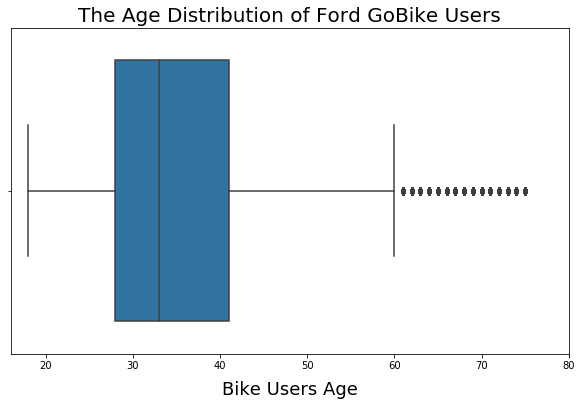

In [15]:
plt.figure(figsize=(10,6))
sb.boxplot(x='member_age', data=dfc, color=base_color, orient='h')
plt.title("The Age Distribution of Ford GoBike Users", fontsize=20)
plt.xlabel("Bike Users Age", fontsize=18, labelpad=10)
plt.xlim(16,80)
plt.savefig('image01.png');

In [16]:
dfc['member_age'].median()

33.0

Above plot may not be explanatory for people who is not familiar with box-plot concept. Thus, let's draw a barplot as well.

In [17]:
#Creation of an empty column
dfc['age_class'] = np.nan
#Creation of age classes
dfc.age_class[(dfc['member_age'] >= 18) & (dfc['member_age'] <= 29)] = str('Age 18-30')
dfc.age_class[(dfc['member_age'] >= 30) & (dfc['member_age'] <= 39)] = str('Age 30-40')
dfc.age_class[(dfc['member_age'] >= 40) & (dfc['member_age'] <= 49)] = str('Age 40-50')
dfc.age_class[(dfc['member_age'] >= 50) & (dfc['member_age'] <= 59)] = str('Age 50-60')
dfc.age_class[(dfc['member_age'] >= 60) & (dfc['member_age'] <= 75)] = str('Age 60-75')

/Users/UGUR/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/UGUR/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/UGUR/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/UGUR/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWi

In [18]:
dfc[['member_age','age_class']].sample(5)

,member_age,age_class
62737,29,Age 18-30
2596368,33,Age 30-40
765006,50,Age 50-60
231101,27,Age 18-30
2101990,28,Age 18-30


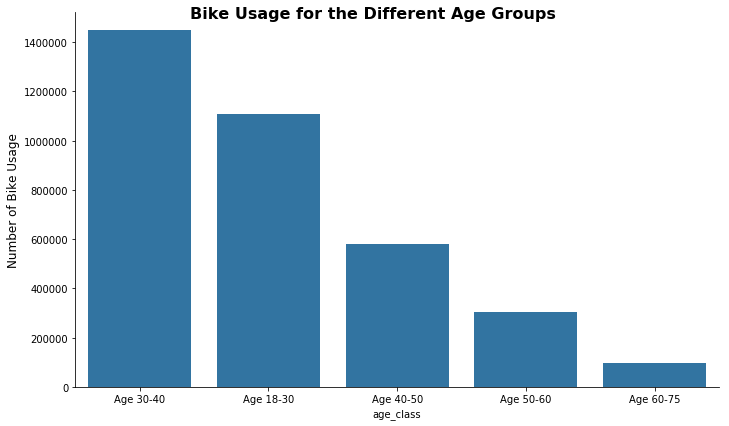

In [19]:
g = sb.catplot(data=dfc , x='age_class', kind='count', color=base_color,
               height=6, aspect=10/6,
               order = dfc['age_class'].value_counts().index);
plt.ylabel('Number of Bike Usage',fontsize=12);
g.fig.suptitle('Bike Usage for the Different Age Groups', fontsize=16, fontweight='semibold');
plt.savefig('image01_2.png');

**Comment**: Box-plot shows that most of the bike sharing system users are around ~33 years old. Parallel to this finding, the bar-chart above shows that people who are between 30-40 years old mostly use the bike sharing system. Young people (age 18-30) do not prefer bike sharing system as much as middle age (30-40) people. After 40 years old, the demand to bike sharing system is gradually decreased as expected.

### 4. Bike usage according to daily hour, day and month

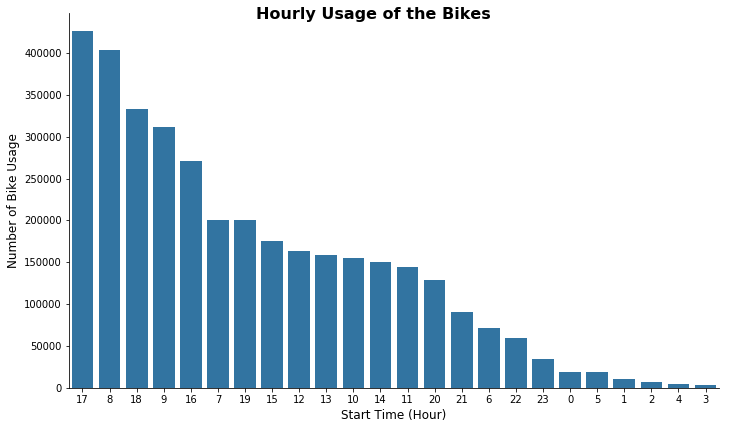

In [20]:
#HOURLY BIKE USAGE
g = sb.catplot(data=dfc , x='start_time_hour', kind='count', color=base_color,
               height=6, aspect=10/6,
               order = dfc['start_time_hour'].value_counts().index)
g.set_axis_labels("Hours", "Number of Bike Trips")
plt.xlabel('Start Time (Hour)',fontsize=12)
plt.ylabel('Number of Bike Usage',fontsize=12)
g.fig.suptitle('Hourly Usage of the Bikes', fontsize=16, fontweight='semibold');
plt.savefig('image02.png');

**Comment**: According the hourly usage for all times, it seems that 5 p.m. and 8 a.m. are the top-2 hours for bike usage. Then 6 p.m. and 9 a.m. are the second top-2 hours for the bike usage. These hours are simply check-in and check-out hours for working people.<br>
The least hours for bike users are the hours between 0-5 a.m. as expected.

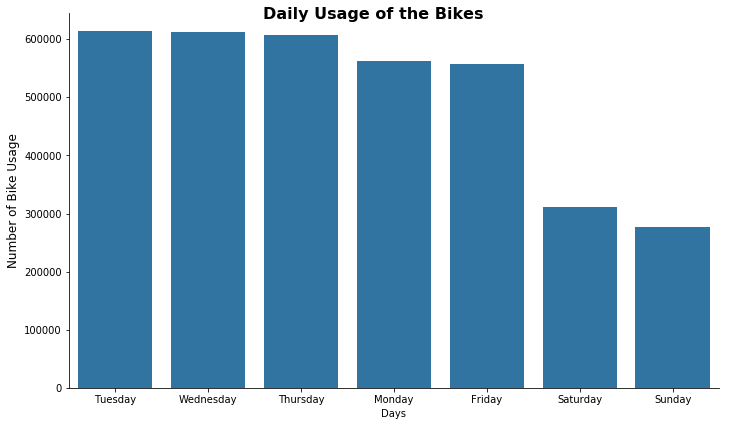

In [21]:
#DAILY BIKE USAGE
g = sb.catplot(data=dfc , x='start_time_weekday', kind='count', color=base_color,
               height=6, aspect=10/6,
               order = dfc['start_time_weekday'].value_counts().index)
g.set_axis_labels("Days", "Number of Bike Trips")
plt.ylabel('Number of Bike Usage',fontsize=12)
g.fig.suptitle('Daily Usage of the Bikes', fontsize=16, fontweight='semibold');
plt.savefig('image03.png');

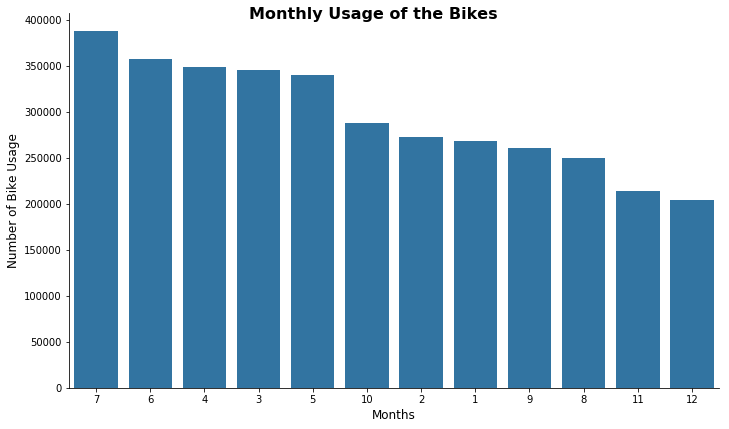

In [22]:
#MONTHLY BIKE USAGE
g = sb.catplot(data=dfc , x='start_time_month', kind='count', color=base_color,
               height=6, aspect=10/6,
               order = dfc['start_time_month'].value_counts().index)
g.set_axis_labels("Hours", "Number of Bike Trips")
plt.xlabel('Months',fontsize=12)
plt.ylabel('Number of Bike Usage',fontsize=12)
g.fig.suptitle('Monthly Usage of the Bikes', fontsize=16, fontweight='semibold');
plt.savefig('image04.png');

**Comment**: According the monthly usage, it seems that the highest amount of bike usage occurs in July based on the data. After July; June, April, March and May comes respectively and their levels are quite close to each others.<br>
The least usages occur in November and December as expected due to climate. Our findings seem logical.

### 5. Trip duration over days

In [23]:
dfc['duration_min'].describe()

count    3.542288e+06
mean     1.287893e+01
std      3.253576e+01
min      1.000000e+00
25%      5.800000e+00
50%      9.100000e+00
75%      1.400000e+01
max      1.438000e+03
Name: duration_min, dtype: float64

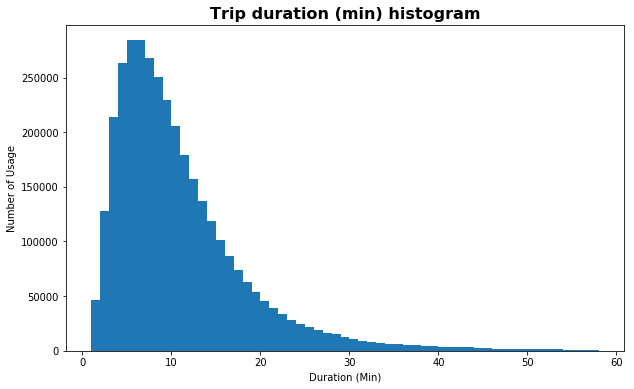

In [24]:
bin_edges = np.arange(1, 58+1, 1)
#
plt.figure(figsize=(10,6))
plt.hist(data = dfc, x = 'duration_min', bins = bin_edges)
plt.title("Trip duration (min) histogram", fontsize=16, fontweight='semibold')
plt.xlabel('Duration (Min)')
plt.ylabel('Number of Usage');
plt.savefig('image05.png');

**Comment:** It seems that most people use the bike sharing system not longer than 30 minutes! Additionally, users use the bikes around 5-15 minutes. Consequently, people use the bike sharing system for short trips in general.

### 6. User types

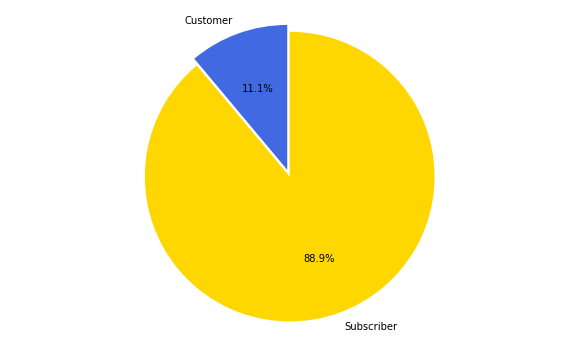

In [25]:
cus_pro = dfc.query('user_type == "Customer"')['bike_id'].count() / dfc['bike_id'].count()
sub_pro = dfc.query('user_type == "Subscriber"')['bike_id'].count() / dfc['bike_id'].count()
proportions = [cus_pro, sub_pro]
#
plt.figure(figsize = [10, 6])
labels = ['Customer', 'Subscriber']
explode = (0, 0.05)
colors = ['royalblue', 'gold'] #Ref: matplotlib.org/3.1.0/gallery/color/named_colors.html
#
plt.pie(proportions, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', startangle=90);
plt.axis('equal');
plt.savefig('image06.png');

**Conclusion:** Subscribers use the bike sharing system significantly more than customers!
Most probably being subscriber provides some discounts!

### Bivariate Exploration

### 1. Hourly bike usage according to user type

<Figure size 720x432 with 0 Axes>

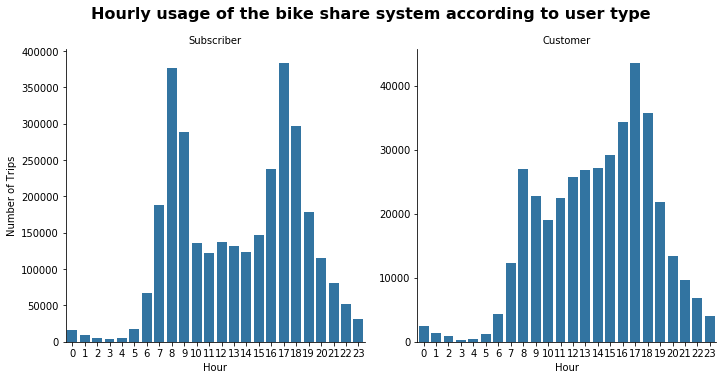

In [26]:
plt.figure(figsize = [10, 6]);
g = sb.catplot(data=dfc, x='start_time_hour', col="user_type", kind='count',
               sharey = False, color = base_color);
g.set_axis_labels("Hour", "Number of Trips");
g.set_titles("{col_name}");
g.fig.suptitle('Hourly usage of the bike share system according to user type',
               y=1.05, fontsize=16, fontweight='semibold');
plt.savefig('image07.png');

**Conclusion:** According the plots above, it seems that use cases in terms of daily hour show differences between subcribers and customers. Subscribers are tend to use the bike sharing system in check-in an check-out days for the work places (8-9 a.m and 5-6 p.m.) and demand from subscribers are low between 10 a.m. and 15 p.m.! However, customers are tend to use bike sharing system mostly starting from 10 a.m. up to 5 p.m.! And also customers use the bike sharing system around 8-9 a.m. but not much as subscribers as use.

### 2. Monthly bike usage according to user type

<Figure size 720x432 with 0 Axes>

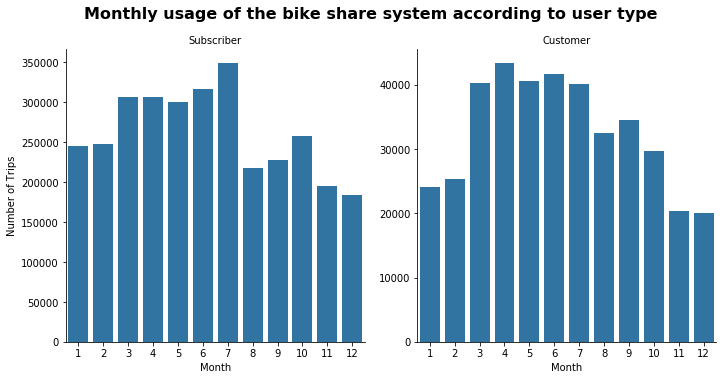

In [27]:
plt.figure(figsize = [10, 6]);
g = sb.catplot(data=dfc, x='start_time_month', col="user_type", kind='count',
               sharey = False, color = base_color);
g.set_axis_labels("Month", "Number of Trips");
g.set_titles("{col_name}");
g.fig.suptitle('Monthly usage of the bike share system according to user type',
               y=1.05, fontsize=16, fontweight='semibold');
plt.savefig('image08.png');

**Conclusion:** According the plots above, it seems that use cases in terms of monthly show similarities between subcribers and customers. Both subscribers and customers are tend to use the bike sharing system in spring and sumer seasons as expected. However, top months are different. Subscribers mostly use the bike sharing system in july however customers use in april at most.

### Multivariate Exploration

### 1. Hourly bike usage according to gender

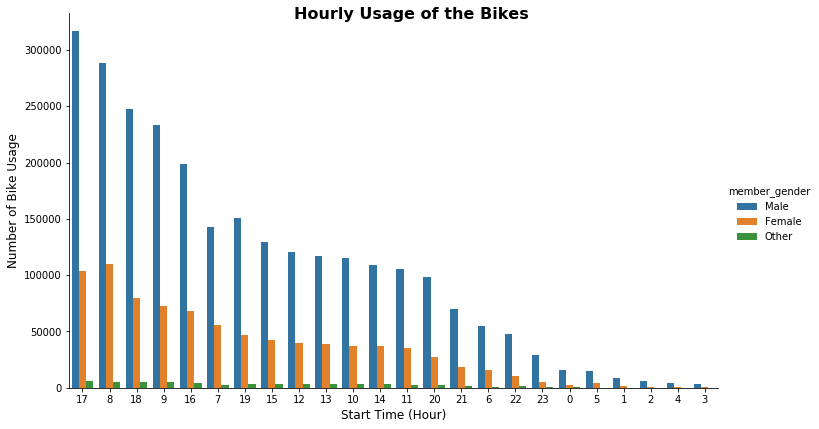

In [28]:
g = sb.catplot(data=dfc , x='start_time_hour', kind='count',
               hue='member_gender', height=6, aspect=10/6,
               order = dfc['start_time_hour'].value_counts().index)
g.set_axis_labels("Hours", "Number of Bike Trips")
plt.xlabel('Start Time (Hour)',fontsize=12)
plt.ylabel('Number of Bike Usage',fontsize=12)
g.fig.suptitle('Hourly Usage of the Bikes', fontsize=16, fontweight='semibold');
plt.savefig('image09.png');

**Comment**: Males, Females and Others (here it's assumed that they have different sexual identities), show not identical but similar preferences in terms of bike usage hours. The second finding from the above plot is that males are significantly higher than females in terms of bike usage.<br>
Aditionally, here log-scale could be used. However, there will be an explanatry part of this study and log-scale can be confusing for people who are not familiar with logarithms. 

### 2. Monthly bike usage according to gender

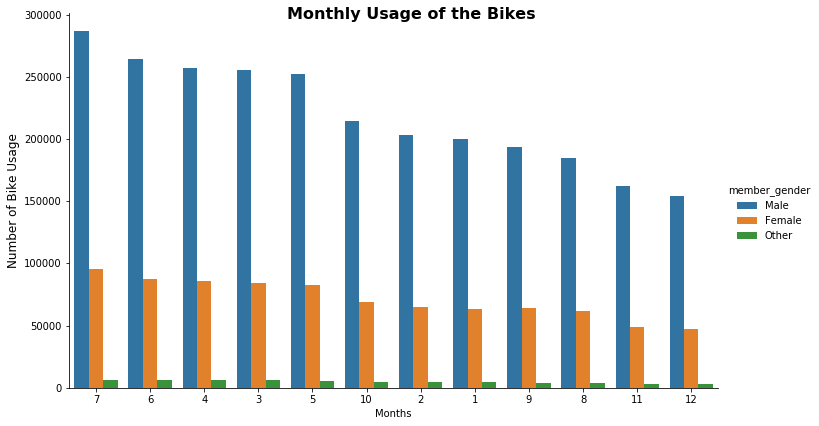

In [29]:
g = sb.catplot(data=dfc , x='start_time_month', kind='count',
               hue='member_gender', height=6, aspect=10/6,
               order = dfc['start_time_month'].value_counts().index)
g.set_axis_labels("Months", "Number of Bike Trips")
#plt.xlabel('Start Time (Month)',fontsize=12)
plt.ylabel('Number of Bike Usage',fontsize=12)
g.fig.suptitle('Monthly Usage of the Bikes', fontsize=16, fontweight='semibold');
plt.savefig('image10.png');

**Comment**: Males, Females and Others (here it's assumed that they have different sexual identities), show not identical but similar preferences in terms of bike usage months. For both males and females the top-3 months are july, june and april respectively.

#### Conclusion for the exploratory analysis part <br>
First of all further plottings and investigations could be done (checking correlations, ploting heat maps etc.). However, in this study three different assessment were done.
* Univariate assessment
* Bivariate assessment
* Multivariate assessment
After each code cell in the analysis section, finding are presented with the comments. However, the main conclusions will be presented in the explonatory analysis report. Plese check.

#### Note that: 
Explanatory analysis is given as slide deck!